In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [4]:
os.chdir('/Users/maxvanhout/Documents/School/Maastricht/Year 2/Scientific Programming/Project/Code')
import functions as fun

In [6]:
chem_df = pd.read_csv("data.csv")
print(chem_df.head())

   MATS3v  nHBint10  MATS3s  MATS3p  ...  SHdNH  ETA_dEpsilon_C  MDEO-22     Class
0  0.0908         0  0.0075  0.0173  ...    0.0         -0.0868     0.00  NonToxic
1  0.0213         0  0.1144 -0.0410  ...    0.0         -0.0810     0.25  NonToxic
2  0.0018         0 -0.0156 -0.0765  ...    0.0         -0.1004     0.00  NonToxic
3 -0.0251         0 -0.0064 -0.0894  ...    0.0         -0.1010     0.00  NonToxic
4  0.0135         0  0.0424 -0.0353  ...    0.0         -0.1071     0.00  NonToxic

[5 rows x 1204 columns]


In [8]:
data_quality = fun.check_data_quality(chem_df, 'Class')
print(data_quality)

No missing values found.

No duplicate rows found.

No non-numeric entries found.

No inconsistent decimal separators found.

{'Unique Values':   Target     Unique Entries
0  Class  [NonToxic, Toxic]}


In [10]:
feature_stats = fun.calculate_feature_statistics(chem_df)
print(feature_stats)

              Feature      Mean   Range  ...  Variance        SD  Number of Zeros
0              MATS3v -0.031244  0.4526  ...  0.004040  0.063559                0
1            nHBint10  0.315789  4.0000  ...  0.582043  0.762918              139
2              MATS3s -0.001001  0.4027  ...  0.004087  0.063928                0
3              MATS3p -0.061501  0.4775  ...  0.005313  0.072891                0
4     nHBDon_Lipinski  0.994152  6.0000  ...  1.229377  1.108773               73
...               ...       ...     ...  ...       ...       ...              ...
1198       ETA_EtaP_B  0.011316  0.0332  ...  0.000030  0.005482                0
1199          nT5Ring  1.467836  5.0000  ...  1.026901  1.013361               32
1200            SHdNH  0.004820  0.4292  ...  0.001978  0.044475              169
1201   ETA_dEpsilon_C -0.085088  0.1954  ...  0.000857  0.029273                0
1202          MDEO-22  0.061702  2.6361  ...  0.058514  0.241896              147

[1203 rows x 8 

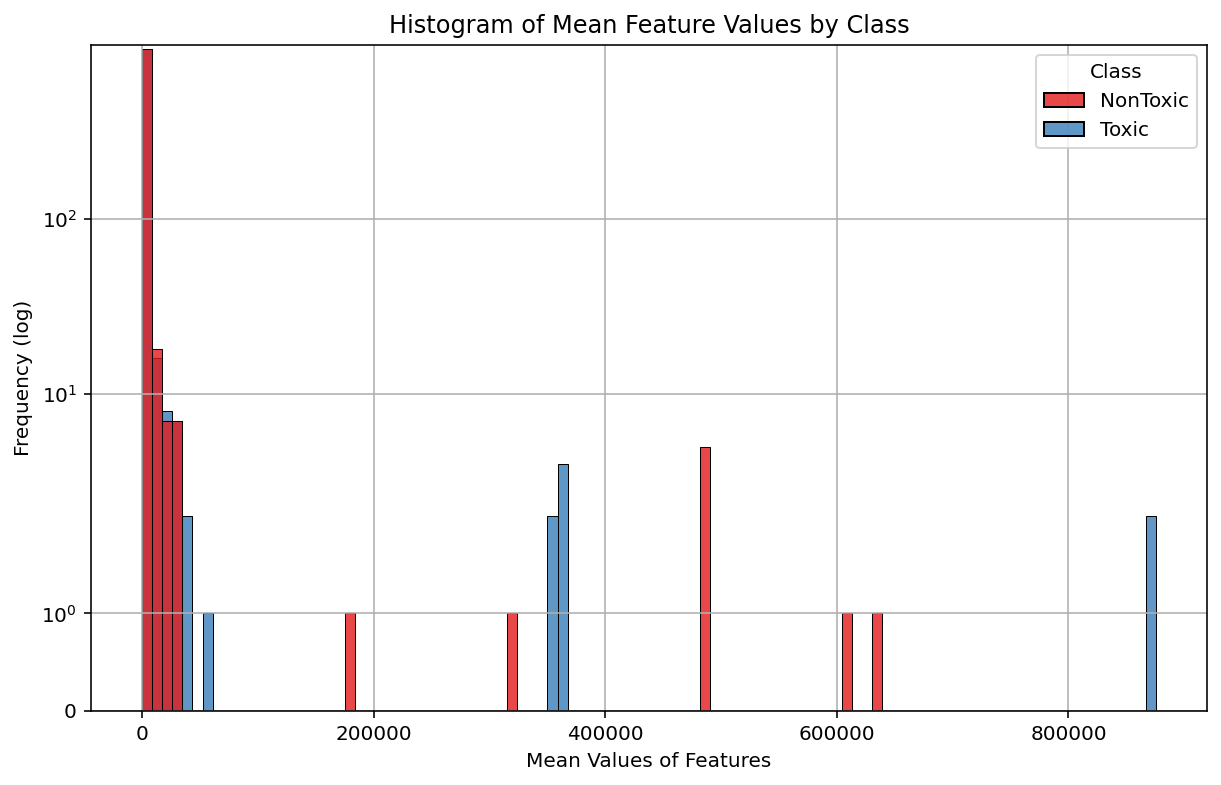

In [132]:
# Step 1: Calculate the mean of each feature grouped by class
means_by_class = chem_df.groupby('Class').mean()

# Step 2: Melt the DataFrame for easier plotting
means_melted = means_by_class.reset_index().melt(id_vars='Class', var_name='feature', value_name='mean_value')

# Step 3: Plot the histogram of mean values for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=means_melted, x='mean_value', hue='Class', bins=100, alpha=0.8, palette='Set1')

# Add labels and title
plt.xlabel('Mean Values of Features')
plt.ylabel('Frequency (log)')
plt.yscale('symlog')
plt.title('Histogram of Mean Feature Values by Class')
plt.grid(True)
plt.show()

In [130]:
chem_df = chem_df.loc[:, (chem_df == 0).sum() <= len(chem_df)*0.7]

In [14]:
X = chem_df.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = chem_df['Class']

In [32]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_dtc = fun.recursive_feature_elimination(X, y, dtc, skf, param_grid)

Analyzing RFE with 2 features
Number of Features: 2, CV Mean Accuracy: 0.6725 ± 0.0278
Analyzing RFE with 3 features
Number of Features: 3, CV Mean Accuracy: 0.7127 ± 0.0823
Analyzing RFE with 4 features
Number of Features: 4, CV Mean Accuracy: 0.7307 ± 0.0760
Analyzing RFE with 5 features
Number of Features: 5, CV Mean Accuracy: 0.7307 ± 0.0760
Analyzing RFE with 6 features
Number of Features: 6, CV Mean Accuracy: 0.7598 ± 0.1279
Analyzing RFE with 7 features
Number of Features: 7, CV Mean Accuracy: 0.7660 ± 0.1085
Analyzing RFE with 8 features
Number of Features: 8, CV Mean Accuracy: 0.7598 ± 0.0935
Analyzing RFE with 9 features
Number of Features: 9, CV Mean Accuracy: 0.7719 ± 0.1034
Analyzing RFE with 10 features
Number of Features: 10, CV Mean Accuracy: 0.7542 ± 0.1230
Analyzing RFE with 11 features
Number of Features: 11, CV Mean Accuracy: 0.8072 ± 0.1114
Analyzing RFE with 12 features
Number of Features: 12, CV Mean Accuracy: 0.8131 ± 0.1136
Analyzing RFE with 13 features
Number

In [ ]:
# Initialize the Randon Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_rfc = fun.recursive_feature_elimination(X, y, rfc, skf, param_grid)

In [22]:
# Standardize the features before applying Logistic Regression
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))  # Standardizing the dataset
# Logistic Regression with L2 regularization
log = LogisticRegression(solver='liblinear', random_state=42)  # 'liblinear' is good for small datasets
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}
results_log = fun.recursive_feature_elimination(X_scaled, y, log, skf, param_grid)

Analyzing RFE with 2 features
Number of Features: 2, CV Mean Accuracy: 0.6725 ± 0.0278
Analyzing RFE with 3 features
Number of Features: 3, CV Mean Accuracy: 0.6781 ± 0.0314
Analyzing RFE with 4 features
Number of Features: 4, CV Mean Accuracy: 0.6781 ± 0.0667
Analyzing RFE with 5 features
Number of Features: 5, CV Mean Accuracy: 0.6784 ± 0.0651
Analyzing RFE with 6 features
Number of Features: 6, CV Mean Accuracy: 0.6725 ± 0.0651
Analyzing RFE with 7 features
Number of Features: 7, CV Mean Accuracy: 0.6964 ± 0.0537
Analyzing RFE with 8 features
Number of Features: 8, CV Mean Accuracy: 0.6967 ± 0.1007
Analyzing RFE with 9 features
Number of Features: 9, CV Mean Accuracy: 0.7026 ± 0.0882
Analyzing RFE with 10 features
Number of Features: 10, CV Mean Accuracy: 0.7144 ± 0.0917
Analyzing RFE with 11 features
Number of Features: 11, CV Mean Accuracy: 0.7376 ± 0.0804
Analyzing RFE with 12 features
Number of Features: 12, CV Mean Accuracy: 0.7206 ± 0.0904
Analyzing RFE with 13 features
Number

In [18]:
# Define the model
model = LogisticRegression(solver='liblinear', random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)
# Call the function
results_filter = fun.feature_selection_filter(X, y, model, cv, score_func=f_classif)

Number of Features: 2, CV Mean Accuracy: 0.6327 ± 0.0750
Number of Features: 3, CV Mean Accuracy: 0.6376 ± 0.0813
Number of Features: 4, CV Mean Accuracy: 0.6722 ± 0.0998
Number of Features: 5, CV Mean Accuracy: 0.6490 ± 0.0950
Number of Features: 6, CV Mean Accuracy: 0.6546 ± 0.0975
Number of Features: 7, CV Mean Accuracy: 0.6546 ± 0.0975
Number of Features: 8, CV Mean Accuracy: 0.6542 ± 0.1015
Number of Features: 9, CV Mean Accuracy: 0.6601 ± 0.1060
Number of Features: 10, CV Mean Accuracy: 0.6493 ± 0.1042
Number of Features: 11, CV Mean Accuracy: 0.6608 ± 0.1078
Number of Features: 12, CV Mean Accuracy: 0.6608 ± 0.0903
Number of Features: 13, CV Mean Accuracy: 0.6431 ± 0.1070
Number of Features: 14, CV Mean Accuracy: 0.6490 ± 0.0834
Number of Features: 15, CV Mean Accuracy: 0.6431 ± 0.0812
Number of Features: 16, CV Mean Accuracy: 0.6431 ± 0.0722
Number of Features: 17, CV Mean Accuracy: 0.6373 ± 0.0945
Number of Features: 18, CV Mean Accuracy: 0.6137 ± 0.1130
Number of Features: 19

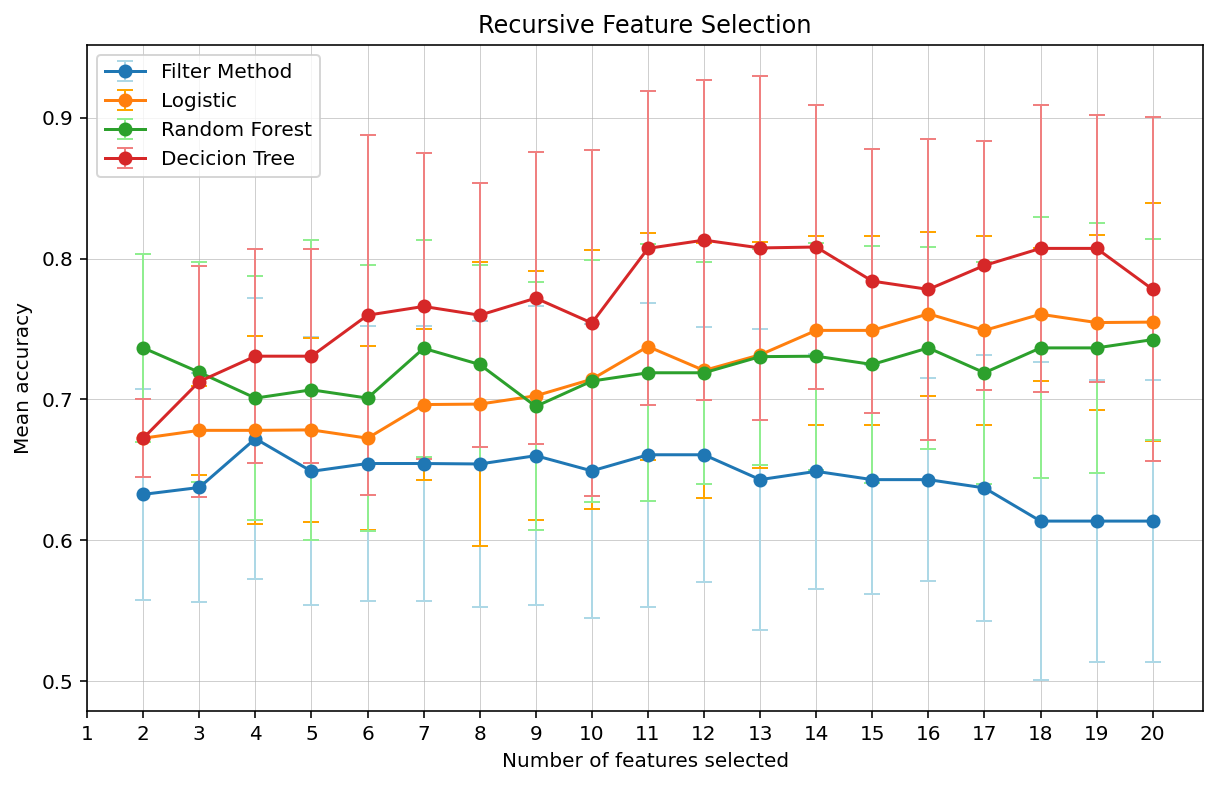

In [20]:

# Plotting
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

# Plot Filter Method Results
plt.errorbar(
    x=results_filter["n_features"],
    y=results_filter["cv_mean_accuracy"],
    yerr=results_filter["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightblue',  # Lighter color for the error bars
    elinewidth=1,  # Width of the error bars
    capsize=4,  # Add caps at the ends of the error bars
    label='Filter Method'  # Label for legend
)

# Plot Logistic Regression results
plt.errorbar(
    x=results_log["n_features"],
    y=results_log["cv_mean_accuracy"],
    yerr=results_log["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='orange',
    elinewidth=1,
    capsize=4,
    label='Logistic'
)

# Plot Random Forest results
plt.errorbar(
    x=results_rfc["n_features"],
    y=results_rfc["cv_mean_accuracy"],
    yerr=results_rfc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightgreen',
    elinewidth=1,
    capsize=4,
    label='Random Forest'
)

# Plot Random Forest results
plt.errorbar(
    x=results_dtc["n_features"],
    y=results_dtc["cv_mean_accuracy"],
    yerr=results_dtc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightcoral',
    elinewidth=1,
    capsize=4,
    label='Decicion Tree'
)

# Set x-ticks to range from 1 to 20
plt.xticks(ticks=range(1, 21))

# Add grid
plt.grid(linewidth=0.3)

# Add title
plt.title("Recursive Feature Selection")

# Add legend
plt.legend()

# Show plot
plt.show()

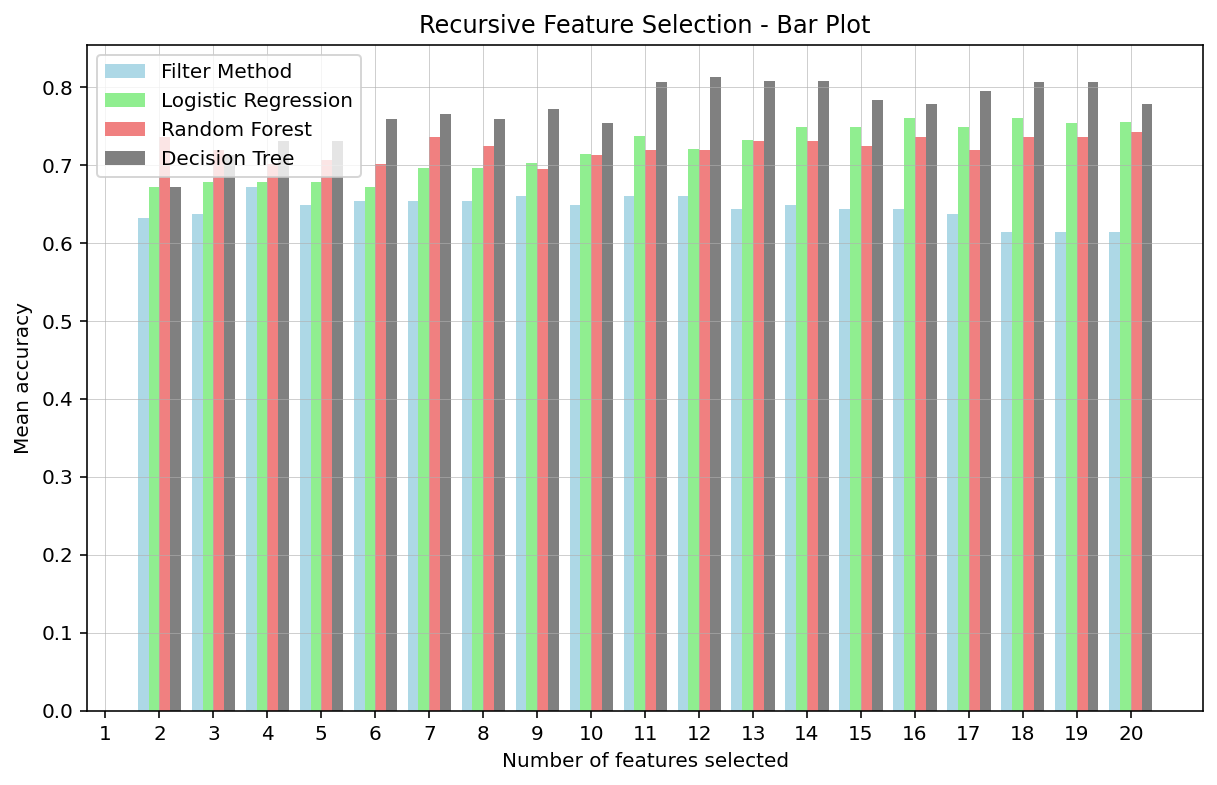

In [12]:
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

width = 0.2  # Width of each bar

# Bar plot for Filter Method
plt.bar(
    results_filter["n_features"] - width*1.5,  # Offset bar position
    results_filter["cv_mean_accuracy"],
    width=width,
    color = 'lightblue',
    label='Filter Method'
)

# Bar plot for Logistic Regression
plt.bar(
    results_log["n_features"] - width*0.5,  # Offset bar position
    results_log["cv_mean_accuracy"],
    width=width,
    color = 'lightgreen',
    label='Logistic Regression'
)

# Bar plot for Random Forest
plt.bar(
    results_rfc["n_features"] + width*0.5,
    results_rfc["cv_mean_accuracy"],
    width=width,
    color = 'lightcoral',
    label='Random Forest'
)

# Bar plot for Decision Tree
plt.bar(
    results_dtc["n_features"] + width*1.5,
    results_dtc["cv_mean_accuracy"],
    width=width,
    color = 'grey',
    label='Decision Tree'
)

plt.xticks(ticks=range(1, 21))
plt.grid(linewidth=0.3)
plt.legend()
plt.title("Recursive Feature Selection - Bar Plot")
plt.show()

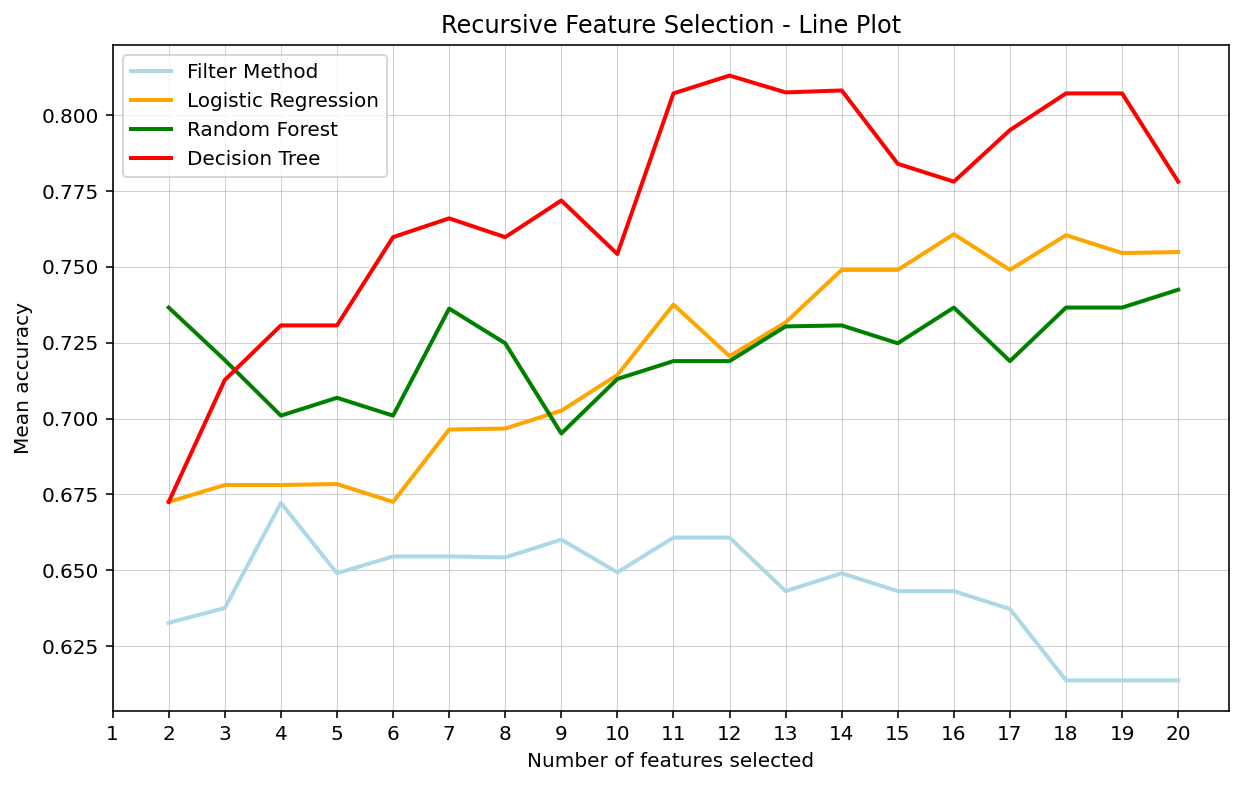

In [10]:
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

# Filter Method
plt.plot(
    results_filter["n_features"],
    results_filter["cv_mean_accuracy"],
    linestyle='-', color='lightblue', linewidth=2,
    label='Filter Method'
)

# Logistic Regression
plt.plot(
    results_log["n_features"],
    results_log["cv_mean_accuracy"],
    linestyle='-', color='orange', linewidth=2,
    label='Logistic Regression'
)

# Random Forest
plt.plot(
    results_rfc["n_features"],
    results_rfc["cv_mean_accuracy"],
    linestyle='-', color='green', linewidth=2,
    label='Random Forest'
)

# Decision Tree
plt.plot(
    results_dtc["n_features"],
    results_dtc["cv_mean_accuracy"],
    linestyle='-', color='red', linewidth=2,
    label='Decision Tree'
)

plt.xticks(ticks=range(1, 21))
plt.grid(linewidth=0.3)
plt.legend()
plt.title("Recursive Feature Selection - Line Plot")
plt.show()